In [37]:
import numpy as np
import random
import matplotlib.pyplot as plt
from pyswarm import pso
from scipy.optimize import *

In [2]:
global eps
eps = 0.001
k = 1000

In [3]:
# The function for calculating Y
def f(x):
    return 1 / (x**2 - 3*x + 2)

In [4]:
# The function ot generate our data to approximate (X, Y) with some noize 
def generate_data():
    
    X = [3*x/k for x in range(0,k)]
    Y = []
    
    noizes = np.random.normal(0,1,k)
    
    for x, noize in zip(X, noizes):
        f_value = f(x)
        if f_value < -100:
            Y.append(-100 + noize)
        if f_value >= -100 and f_value <= 100:
            Y.append(f_value + noize)
        if f_value > 100:
            Y.append(100 + noize)

    
    return X, Y

In [5]:
X, Y = generate_data()

In [6]:
# Initial point for a,b,c,d which we define by minimizing the function of loss()
x0 = (0.01,0.01,0.01,0.01)

In [7]:
def rational(x, a, b, c, d):
    return (a*x + b)/(x**2 + c*x + d)

In [8]:
# The function for calculating the means least squares
def loss(x):
    sum = 0
    for i in range(k):
        sum += (rational(X[i], x[0], x[1], x[2], x[3]) - Y[i])**2
    return sum

#### Nelder-Mead algorithm

In [9]:
nelder_mead = minimize(loss, x0, method='Nelder-Mead', tol=eps)

a_nm, b_nm, c_nm, d_nm = nelder_mead.x
a_nm, b_nm, c_nm, d_nm

(-2.015295208321267,
 2.016388178278876,
 -2.0009189494584154,
 1.0010184141269127)

In [33]:
nelder_mead

 final_simplex: (array([[-2.01529521,  2.01638818, -2.00091895,  1.00101841],
       [-2.01529518,  2.01638824, -2.00091909,  1.00101855],
       [-2.01529425,  2.01638754, -2.0009179 ,  1.00101738],
       [-2.01529415,  2.01638821, -2.00091938,  1.00101887],
       [-2.01529525,  2.01638762, -2.0009178 ,  1.00101728]]), array([173120.83946323, 173120.83955337, 173120.83972883, 173120.839836  ,
       173120.83988383]))
           fun: 173120.83946323057
       message: 'Optimization terminated successfully.'
          nfev: 474
           nit: 278
        status: 0
       success: True
             x: array([-2.01529521,  2.01638818, -2.00091895,  1.00101841])

#### Levenberg-Marquardt algorithm

In [10]:
popt, pcov, infodict, errmsg, ier = curve_fit(rational, X, Y, method='lm', full_output=True)
infodict

{'fvec': array([ 1.48106472e+00,  7.38914863e-02,  3.83800717e-01, -8.71863414e-02,
        -2.07050800e+00, -1.82793721e-01,  3.53150641e-01, -1.03070261e+00,
         1.52761380e+00, -1.08925619e+00,  1.55025768e+00,  1.92302967e+00,
         8.06419009e-01,  2.02259320e+00,  8.20315475e-01,  1.02105414e+00,
         1.22166434e+00, -7.43393944e-01,  1.39645095e+00, -7.29815271e-01,
        -1.21445535e-01,  1.19629128e+00, -7.62651836e-01, -1.26198491e+00,
        -1.23318972e+00,  1.50886305e+00,  1.55439684e+00, -1.67133972e-02,
        -7.15798787e-01, -1.62192359e-02, -6.53634485e-01, -1.62973410e+00,
         1.08927287e+00, -2.86979792e-01,  1.06899910e+00,  1.13188392e+00,
         3.77678276e-01, -1.03838940e+00, -9.92624306e-02,  1.57800827e+00,
        -5.46908817e-01, -1.22207425e+00, -3.47350872e-01,  8.03458374e-01,
         6.65773337e-01, -6.46184823e-01,  2.35019034e+00, -3.81665073e-02,
        -4.90238143e-01,  1.55161939e+00, -1.14843587e+00,  8.04593926e-03,
    

In [11]:
a_lm, b_lm, c_lm, d_lm = popt
a_lm, b_lm, c_lm, d_lm

(-1.000554285597279, 1.00102055813709, -2.0008514917219276, 1.000867482194849)

#### Particle Swarm Optimization

In [39]:
p = pso(loss, lb=(-5,-5,-5,-5), ub=(5,5,5,5), maxiter=100, minstep=eps, debug=True)

No constraints given.
Best after iteration 1: [-2.90407826  2.6129298  -0.34027936  2.14643449] 266748.81402070384
Best after iteration 2: [-2.90407826  2.6129298  -0.34027936  2.14643449] 266748.81402070384
New best for swarm at iteration 3: [-3.0339111   1.85117238  0.33509157  0.84125267] 266596.0131535436
New best for swarm at iteration 3: [-2.74582387  1.32171384 -0.46695702  1.18617029] 266488.7791650349
Best after iteration 3: [-2.74582387  1.32171384 -0.46695702  1.18617029] 266488.7791650349
New best for swarm at iteration 4: [-2.87964269  2.67807207 -1.32899189  1.5476038 ] 266073.85312377836
New best for swarm at iteration 4: [-3.17235455  2.42116647 -1.1525511   1.39940905] 265964.5819375624
Best after iteration 4: [-3.17235455  2.42116647 -1.1525511   1.39940905] 265964.5819375624
New best for swarm at iteration 5: [-3.7317385   2.48771081 -1.32138033  1.36273151] 265847.50993571774
Best after iteration 5: [-3.7317385   2.48771081 -1.32138033  1.36273151] 265847.5099357177

In [40]:
coefs, _ = p
a_pso, b_pso, c_pso, d_pso = coefs
a_pso, b_pso, c_pso, d_pso

(-0.7389588763729928,
 1.6898872960773725,
 -1.590125281787248,
 -0.8199411634396346)

#### Differential Evolution

In [45]:
de = differential_evolution(loss, [(-5,5), (-5,5), (-5,5), (-5,5)], tol=eps)

In [46]:
de

     fun: 196403.36745391693
     jac: array([  -1.14087015,    0.56752469, -167.30919015, -164.07866497])
 message: 'Optimization terminated successfully.'
    nfev: 7695
     nit: 126
 success: True
       x: array([-1.69885581,  0.28748449,  3.5461104 , -4.54887816])

In [47]:
a_de, b_de, c_de, d_de = de.x
a_de, b_de, c_de, d_de

(-1.6988558090611592,
 0.28748448870934773,
 3.546110400623377,
 -4.548878164653828)

#### Visualization

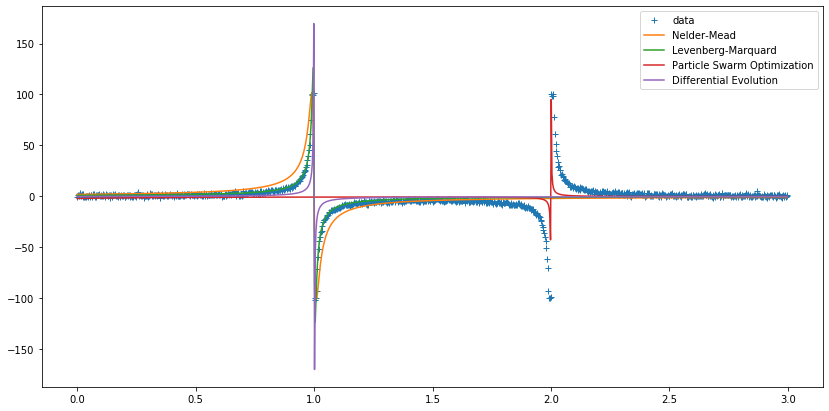

In [48]:
plt.figure(figsize=(14, 7))
plt.plot(X, Y, '+', label='data')

Y_nelder_mead = [rational(x, a_nm, b_nm, c_nm, d_nm) for x in X]
plt.plot(X, Y_nelder_mead, label='Nelder-Mead')

Y_lm = [rational(x, a_lm, b_lm, c_lm, d_lm) for x in X]
plt.plot(X, Y_lm, label='Levenberg-Marquard')

Y_pso = [rational(x, a_pso, b_pso, c_pso, d_pso) for x in X]
plt.plot(X, Y_pso, label='Particle Swarm Optimization')

Y_de = [rational(x, a_de, b_de, c_de, d_de) for x in X]
plt.plot(X, Y_de, label='Differential Evolution')

plt.legend()